<a href="https://colab.research.google.com/github/JoaoDaross/Python_Investimentos/blob/master/Investimentos_4.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 1. Importando bibliotecas

In [ ]:
!pip install yfinance --upgrade --no-cache-dir
import yfinance as yf

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# 2. Obtendo e tratando os dados

In [2]:
tickers = "ABEV3.SA ITSA4.SA WEGE3.SA USIM5.SA VALE3.SA"

carteira = yf.download(tickers, period="5y")["Adj Close"]

ibov = yf.download("^BVSP", period="5y")["Adj Close"]

[*********************100%***********************]  5 of 5 completed
[*********************100%***********************]  1 of 1 completed


In [3]:
carteira.dropna(inplace=True)
carteira

,ABEV3.SA,ITSA4.SA,USIM5.SA,VALE3.SA,WEGE3.SA
Date,,,,,
2015-10-02,17.614170,4.372668,3.065049,14.944030,11.374210
2015-10-05,17.868811,4.472848,3.200842,15.212384,11.652656
2015-10-06,17.464895,4.537673,3.220241,15.354949,11.624875
2015-10-07,17.561485,4.679111,3.288138,16.897991,11.722245
2015-10-08,17.280500,4.696787,3.559724,16.822519,11.311588
...,...,...,...,...,...
2020-09-28,12.480000,8.970000,10.140000,58.779999,62.889999
2020-09-29,12.350000,8.820000,9.850000,58.349998,64.940002
2020-09-30,12.540000,8.800000,10.030000,59.110001,65.699997


In [4]:
ibov.dropna(inplace=True)
ibov

Date
2015-10-02    47033.0
2015-10-05    47598.0
2015-10-06    47735.0
2015-10-07    48914.0
2015-10-08    49107.0
               ...   
2020-09-28    94666.0
2020-09-29    93580.0
2020-09-30    94603.0
2020-10-01    95479.0
2020-10-02    94016.0
Name: Adj Close, Length: 1235, dtype: float64

# 3. Resultados

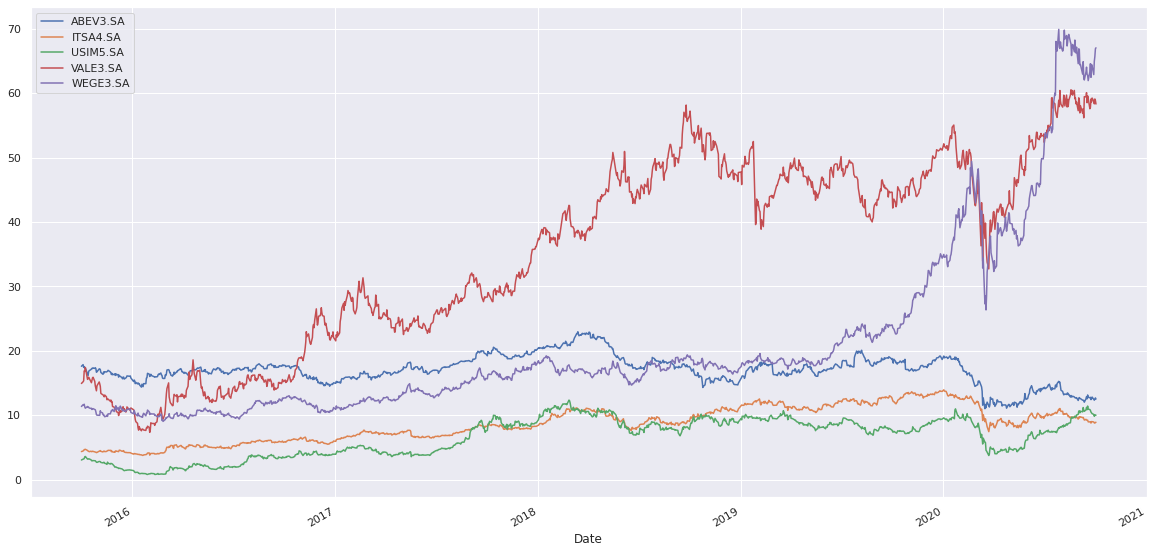

In [6]:
sns.set()
carteira.plot(figsize=(20,10));

In [7]:
carteira_normalizada = (carteira / carteira.iloc[0])*10000
carteira_normalizada.dropna(inplace=True)

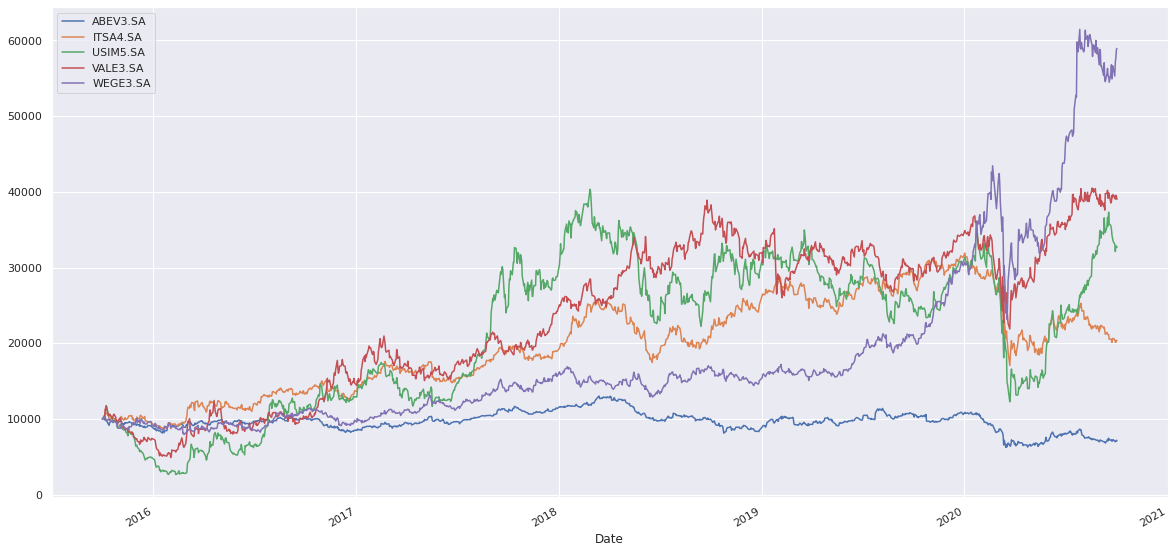

In [8]:
carteira_normalizada.plot(figsize=(20,10));

In [9]:
carteira_normalizada["saldo"] = carteira_normalizada.sum(axis=1)

In [10]:
carteira_normalizada

,ABEV3.SA,ITSA4.SA,USIM5.SA,VALE3.SA,WEGE3.SA,saldo
Date,,,,,,
2015-10-02,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,50000.000000
2015-10-05,10144.565755,10229.105329,10443.036911,10179.572993,10244.804022,51241.085009
2015-10-06,9915.252989,10377.354828,10506.327676,10274.972143,10220.379880,51294.287516
2015-10-07,9970.089545,10700.814131,10727.848077,11307.519724,10305.985952,53012.257428
2015-10-08,9810.567480,10741.239864,11613.923455,11257.016694,9944.943809,53367.691302
...,...,...,...,...,...,...
2020-09-28,7085.204406,20513.793178,33082.672915,39333.432504,55291.749855,155306.852859
2020-09-29,7011.400667,20170.751860,32136.521677,39045.691974,57094.075456,155458.441635
2020-09-30,7119.268128,20125.014326,32723.785924,39554.257700,57762.248879,157284.574958


In [11]:
ibov_normalizado = (ibov / ibov.iloc[0])*50000
ibov_normalizado

Date
2015-10-02     50000.000000
2015-10-05     50600.642102
2015-10-06     50746.284524
2015-10-07     51999.659813
2015-10-08     52204.834903
                  ...      
2020-09-28    100637.850020
2020-09-29     99483.341484
2020-09-30    100570.875768
2020-10-01    101502.136798
2020-10-02     99946.845832
Name: Adj Close, Length: 1235, dtype: float64

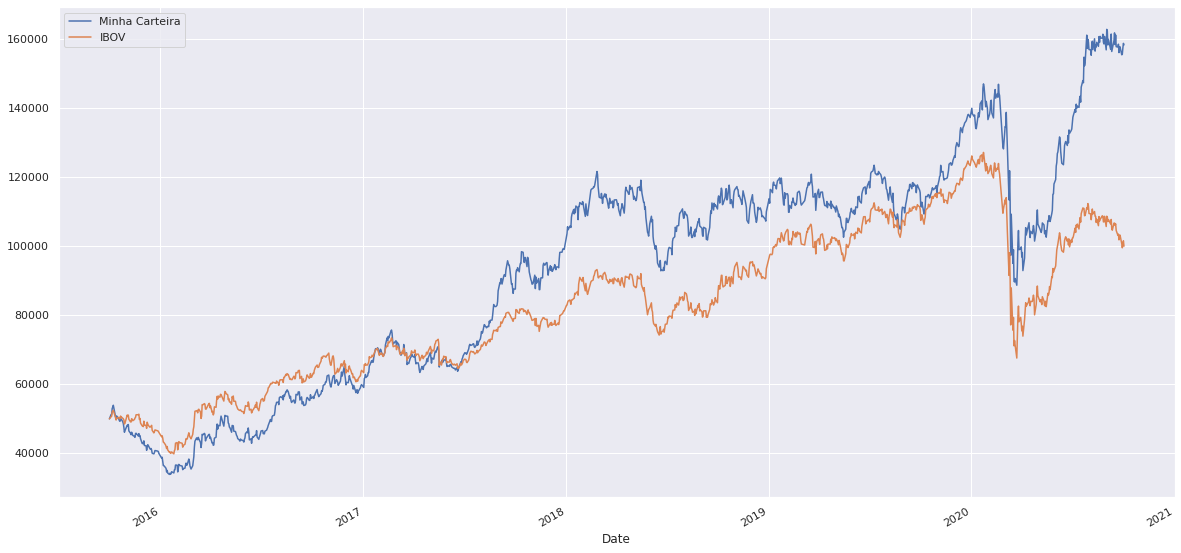

In [13]:
carteira_normalizada["saldo"].plot(figsize=(20,10), label="Minha Carteira")
ibov_normalizado.plot(label="IBOV")
plt.legend();

In [14]:
carteira_normalizada.describe()

,ABEV3.SA,ITSA4.SA,USIM5.SA,VALE3.SA,WEGE3.SA,saldo
count,1243.000000,1243.000000,1243.000000,1243.000000,1243.000000,1243.000000
mean,9690.435889,19833.866709,21465.764128,23559.211678,18216.236991,92765.515395
std,1260.454479,6138.607130,9764.152010,9933.755932,11771.517961,32587.101382
min,6262.003652,8649.117915,2689.873268,4922.996568,7961.332047,33908.678760
25%,9097.003020,14712.085921,12768.986724,15755.976518,10752.238419,62862.496060
50%,9741.773001,19750.287591,24620.253076,26141.564833,14908.766230,103062.461633
75%,10355.818765,24927.845774,29588.605749,31909.314841,18837.680825,114974.272937
max,13043.063388,31930.951176,40348.099597,40504.272158,61465.777191,162671.267315
